# CLUB algorithm draft - Online Clustering of Bandits

Antoine GRELETY

Vincent LE MEUR

In [15]:
import numpy as np
import numpy.random as npr
import numpy.linalg
import pandas as pd
from scipy.spatial.distance import euclidean
import networkx as nx
import matplotlib.pyplot as plt

In [16]:
%load_ext autoreload
%autoreload 2
import online_cluster

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [17]:
n_user=60
n_cluster=3
T=15500
D=5
c=5
Online =online_cluster.OLCB(T=T,n_user=n_user,n_cluster=n_cluster,D=D,c=3,graph_density=3*int(np.log(n_user)*n_user))

On représente tous les n_users :

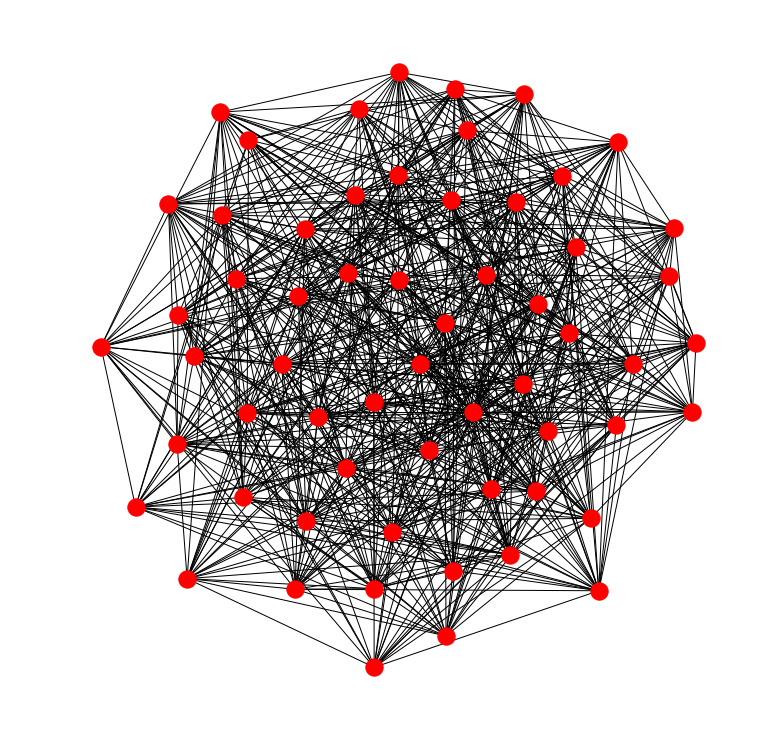

In [18]:
plt.figure(figsize=(10,10))
nx.draw(Online.V)
plt.show()
#plt.savefig('graphe_initial.png')

In [19]:
#paramètrage des algorithmes
sigma=0.3
alpha=5
alpha2=1
z=0
method = "fixed design"

#### Algorithme CLUB

In [20]:
list_m, list_CB, list_omega, list_payoff, list_random_payoff, regret_cum, regret_cum_random, V = Online.CLUB(sigma=sigma,alpha=alpha,alpha2=alpha2,z=z,method=method)

#### Algorithme LINUCB_IND 

In [21]:
list_payoff_Lin,regret_cum_Lin,regret_cum_random_Lin = Online.LinUCB_IND(sigma=sigma,alpha=alpha,method=method)

Regardons l'évolution du nombre de Cluster au fur et à mesure des ittérations :

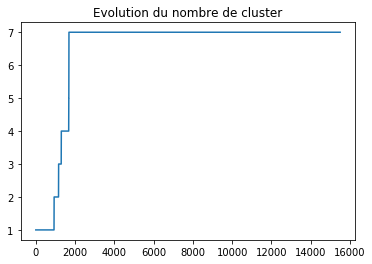

In [22]:
fig = plt.figure()
plt.plot(list_m)
plt.title("Evolution du nombre de cluster")
plt.show()
#plt.savefig('nombre_clusters_evol.png')

Observons l'évolution des Confidence Bound :

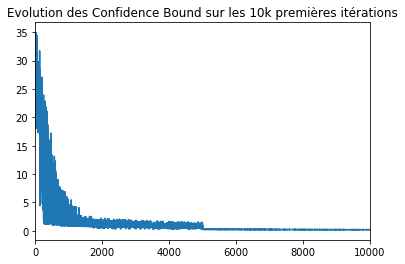

In [23]:
plt.figure()
plt.plot(list_CB)
plt.title("Evolution des Confidence Bound sur les 10k premières itérations")
plt.xlim(0,10000)
plt.show()
#plt.savefig('CB_evol.png')

Observons l'évolution de la payoff cumulée en fonction des ittérations :

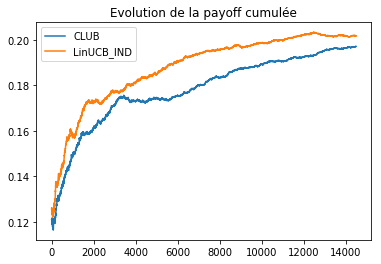

In [24]:
plt.figure()
plt.plot(Online.payoff_cum(list_payoff)[1000:Online.T])
plt.plot(Online.payoff_cum(list_payoff_Lin)[1000:Online.T])
plt.title("Evolution de la payoff cumulée")
plt.legend(["CLUB","LinUCB_IND"])
plt.show()
#plt.savefig('payoff_cumul.png')

Observons enfin le regret cumulé associé : 

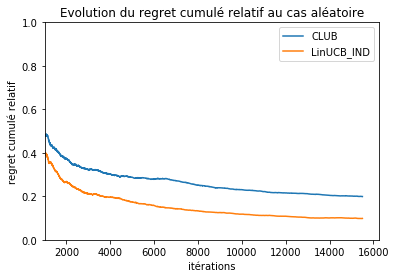

In [25]:
#plt.plot(-regret_cum_random)
plt.figure()
plt.plot(regret_cum/regret_cum_random)
plt.plot(regret_cum_Lin/regret_cum_random_Lin)
plt.legend(["CLUB","LinUCB_IND"])
plt.xlim(1000,)
plt.ylim(0,1)
plt.xlabel("itérations")
plt.ylabel("regret cumulé relatif")
plt.title("Evolution du regret cumulé relatif au cas aléatoire")
plt.show()
plt.savefig('regret_cumul.png')

Les nouveux clusters sont :

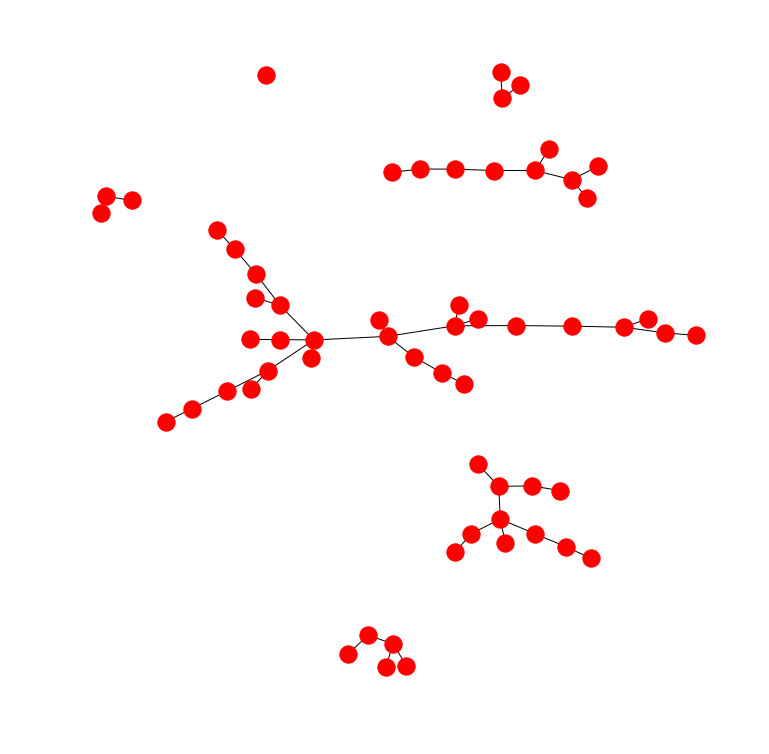

In [26]:
plt.figure(figsize=(10,10))
nx.draw(V)
plt.show()

In [27]:
Online.U

array([[ 1.        ,  1.        , -1.        , -1.        ,  1.        ],
       [-0.19160817, -0.00629622,  0.14740038,  0.17444307,  0.07816118],
       [ 0.62068793,  0.68276491, -0.69594333, -0.46266888,  0.7007695 ],
       [ 0.42429559,  0.28200517, -0.10907167, -0.59666096,  0.12306537],
       [-0.15244077, -0.00506462,  0.1200843 ,  0.13868241,  0.06362214],
       [ 0.53440444,  0.60083555, -0.62055584, -0.38429322,  0.62476339],
       [ 0.3747495 ,  0.24959445, -0.09678977, -0.52932646,  0.10922804],
       [-0.13505907, -0.00448662,  0.10674759,  0.12286728,  0.05651085],
       [ 0.48880375,  0.55429119, -0.57546294, -0.34607174,  0.57932512],
       [ 0.34515123,  0.22960009, -0.08903269, -0.48956377,  0.10047891],
       [-0.12432783, -0.00412637,  0.09827644,  0.11310268,  0.05199294],
       [ 0.4583364 ,  0.52220907, -0.5436775 , -0.3214807 ,  0.54730137],
       [ 0.32447313,  0.21547354, -0.08350107, -0.4617793 ,  0.0942317 ],
       [-0.11674108, -0.00386916,  0.0

In [28]:
Online.center

array([[ 0.29657784,  0.15127379,  0.31947864,  0.44066601,  0.43234412],
       [-0.05822024, -0.10777627, -0.11149307,  0.87779222, -0.57009112],
       [ 0.95323239, -0.98259886,  0.94101153,  0.18786775, -0.69862341]])